Enter value for season: 1
Enter value for yr: 1
Enter value for mnth: 1
Enter value for hr: 1
Enter value for holiday: 1
Enter value for weekday: 1
Enter value for workingday: 1
Enter value for weathersit: 1
Enter value for temp: 1
Enter value for atemp: 1
Enter value for hum: 1
Enter value for windspeed: 1
Enter value for casual: 1
Enter value for registered: 1

Predicted cnt: 2.000000000000029
Ensemble R2 Score on Test Data: 99.98%
Linear Regression Metrics:
MAPE: 0.00%
RMSE: 0.00

Decision Tree Metrics:
MAPE: 1.00%
RMSE: 4.79

Random Forest Metrics:
MAPE: 0.45%
RMSE: 2.72



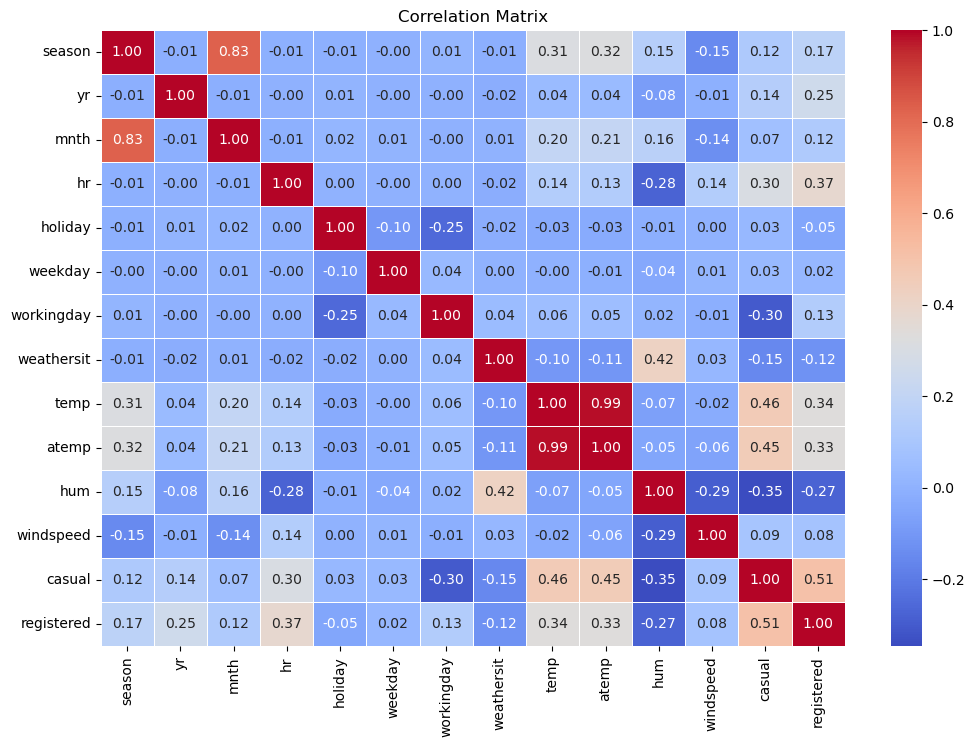

In [3]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file into a DataFrame
data = pd.read_csv('hour.csv')

# Select the features (attributes) and target variable
features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
X = data[features]
y = data['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models to the training data
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Ask the user for input values for the features
user_input = {}
for feature in features:
    user_input[feature] = float(input(f'Enter value for {feature}: '))

# Convert the user input into a DataFrame
user_df = pd.DataFrame([user_input])

# Predict the 'cnt' for the user input using each model
predicted_cnt_linear = linear_model.predict(user_df)
predicted_cnt_decision_tree = decision_tree_model.predict(user_df)
predicted_cnt_random_forest = random_forest_model.predict(user_df)

# Combine predictions using simple averaging
combined_prediction = (predicted_cnt_linear + predicted_cnt_decision_tree + predicted_cnt_random_forest) / 3

print(f'\nPredicted cnt: {combined_prediction[0]}')

# Evaluate the combined model on the test data and calculate R-squared (R2) score
ensemble_predictions = (linear_model.predict(X_test) + decision_tree_model.predict(X_test) + random_forest_model.predict(X_test)) / 3
r2_combined = r2_score(y_test, ensemble_predictions)

print(f'Ensemble R2 Score on Test Data: {r2_combined * 100:.2f}%')

# Calculate Mean Absolute Percentage Error (MAPE) for each model
def calculate_mape(y_true, y_pred):
    return (abs((y_true - y_pred) / y_true)).mean() * 100

y_pred_linear = linear_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

mape_linear = calculate_mape(y_test, y_pred_linear)
mape_decision_tree = calculate_mape(y_test, y_pred_decision_tree)
mape_random_forest = calculate_mape(y_test, y_pred_random_forest)

# Calculate Root Mean Squared Error (RMSE) for each model
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
rmse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree, squared=False)
rmse_random_forest = mean_squared_error(y_test, y_pred_random_forest, squared=False)

# Display the metrics for each model, including MAPE and RMSE
print("Linear Regression Metrics:")
print(f"MAPE: {mape_linear:.2f}%")
print(f"RMSE: {rmse_linear:.2f}\n")

print("Decision Tree Metrics:")
print(f"MAPE: {mape_decision_tree:.2f}%")
print(f"RMSE: {rmse_decision_tree:.2f}\n")

print("Random Forest Metrics:")
print(f"MAPE: {mape_random_forest:.2f}%")
print(f"RMSE: {rmse_random_forest:.2f}\n")

# Create a heatmap to visualize the correlation matrix
correlation_matrix = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
